In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as ny # linear algebra
import pandas as ps # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sn
from mlxtend.plotting import plot_decision_regions

import  tensorflow as tw
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
x, y = make_moons(100, noise = 0.25, random_state = 2)

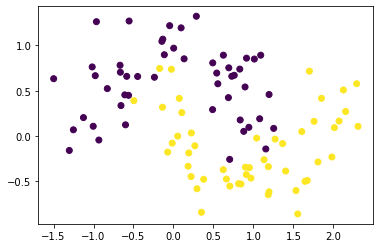

In [3]:
plt.scatter(x[:, 0], x[:, 1], c = y)
plt.show()

In [4]:
model1 = Sequential()

model1.add(Dense(128, input_dim = 2, activation = 'relu'))
model1.add(Dense(128, activation = 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               384       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


2022-12-28 00:27:21.205621: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
adam = Adam(learning_rate = 0.01)
model1.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
traininglog1 = model1.fit(x, y, epochs = 1000, validation_split = 0.2, verbose = 1)

2022-12-28 00:27:21.338714: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/1000
3/3 [==============================] - 1s 133ms/step - loss: 0.6230 - accuracy: 0.5375 - val_loss: 0.3964 - val_accuracy: 0.9000
Epoch 2/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.4398 - accuracy: 0.8375 - val_loss: 0.2067 - val_accuracy: 0.9000
Epoch 3/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.4039 - accuracy: 0.8000 - val_loss: 0.1938 - val_accuracy: 0.9000
Epoch 4/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.3648 - accuracy: 0.8500 - val_loss: 0.2533 - val_accuracy: 0.9000
Epoch 5/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.3648 - accuracy: 0.8375 - val_loss: 0.2509 - val_accuracy: 0.9000
Epoch 6/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.3545 - accuracy: 0.8250 - val_loss: 0.2147 - val_accuracy: 0.9000
Epoch 7/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.3327 - accuracy: 0.8625 - val_loss: 0.2098 - val_accuracy: 0.9000
Epoch 8/1000

<AxesSubplot:>

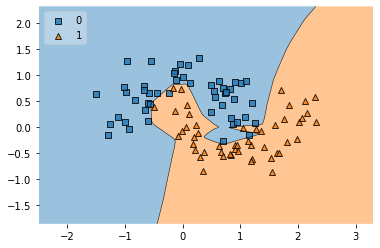

In [6]:
plot_decision_regions(x, y.astype('int'), clf = model1, legend = 2)

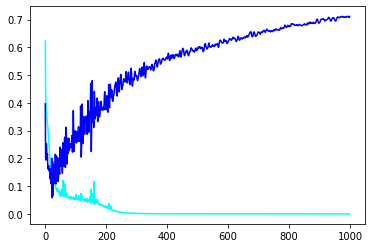

In [7]:
plt.plot(traininglog1.history['loss'], c = 'cyan', label = "loss")
plt.plot(traininglog1.history['val_loss'], c = 'blue', label = "val_loss")

In [8]:
model2 = Sequential()

model2.add(Dense(128, input_dim = 2, activation = 'relu', kernel_regularizer = tw.keras.regularizers.l2(0.03)))
# model2.add(Dense(128, input_dim = 2, activation = 'relu', kernel_regularizer = tw.keras.regularizers.l1(0.03)))
model2.add(Dense(128, activation = 'relu', kernel_regularizer = tw.keras.regularizers.l2(0.03)))
# model2.add(Dense(128, activation = 'relu', kernel_regularizer = tw.keras.regularizers.l1(0.03)))
model2.add(Dense(1, activation = 'sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               384       
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [9]:
adam = Adam(learning_rate = 0.01)
model2.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
traininglog2 = model2.fit(x, y, epochs = 1000, validation_split = 0.2, verbose = 1)

Epoch 1/1000
3/3 [==============================] - 1s 116ms/step - loss: 4.1006 - accuracy: 0.6500 - val_loss: 2.7188 - val_accuracy: 0.9000
Epoch 2/1000
3/3 [==============================] - 0s 20ms/step - loss: 2.3814 - accuracy: 0.8125 - val_loss: 1.5212 - val_accuracy: 0.9000
Epoch 3/1000
3/3 [==============================] - 0s 22ms/step - loss: 1.3677 - accuracy: 0.8500 - val_loss: 0.8992 - val_accuracy: 0.9000
Epoch 4/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.8593 - accuracy: 0.8250 - val_loss: 0.5948 - val_accuracy: 0.9000
Epoch 5/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.6690 - accuracy: 0.8125 - val_loss: 0.5068 - val_accuracy: 0.9000
Epoch 6/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6318 - accuracy: 0.8125 - val_loss: 0.5251 - val_accuracy: 0.9000
Epoch 7/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6355 - accuracy: 0.8500 - val_loss: 0.5455 - val_accuracy: 0.9000
Epoch 8/1000

<AxesSubplot:>

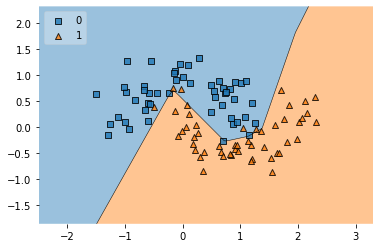

In [10]:
plot_decision_regions(x, y.astype('int'), clf = model2, legend = 2)

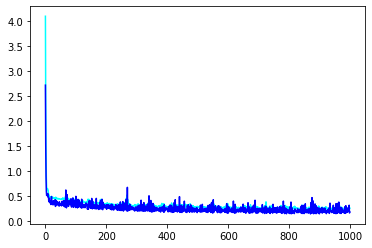

In [11]:
plt.plot(traininglog2.history['loss'], c = 'cyan', label = "loss")
plt.plot(traininglog2.history['val_loss'], c = 'blue', label = "val_loss")

In [12]:
model1Weightlayer1 = model1.get_weights()[0].reshape(256)
model2Weightlayer1 = model2.get_weights()[0].reshape(256)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

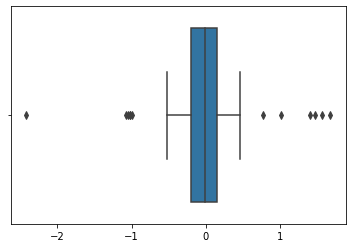

In [13]:
sn.boxplot(model1Weightlayer1)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

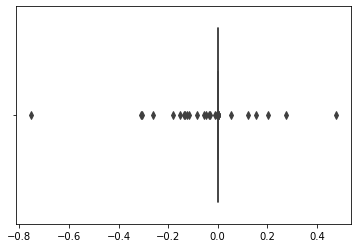

In [14]:
sn.boxplot(model2Weightlayer1)

In [15]:
model1Weightlayer1.min(), model1Weightlayer1.max()

(-2.4263086, 1.6845591)

In [16]:
model2Weightlayer1.min(), model2Weightlayer1.max()

(-0.7515867, 0.4751892)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

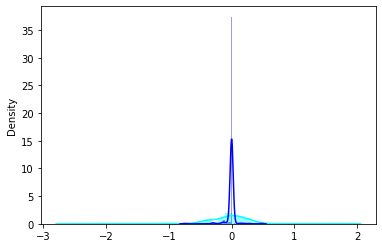

In [17]:
sn.distplot(model1Weightlayer1, color = 'cyan', label = 'Without Regularization')
sn.distplot(model2Weightlayer1, color = 'blue', label = 'With Regularization')